In [1]:
import pandas as pd
from UDFs import TextPreprocessor
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
import joblib
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None) # To display all columns in the console

In [2]:
# Load the data
df_jokes = pd.read_csv('jokes.csv')
print(df_jokes.head())

                                                text  humor
0  Joe biden rules out 2020 bid: 'guys, i'm not r...  False
1  Watch: darvish gave hitter whiplash with slow ...  False
2  What do you call a turtle without its shell? d...   True
3      5 reasons the 2016 election feels so personal  False
4  Pasco police shot mexican migrant from behind,...  False


In [3]:
# Check for missing values
print("There are no missing values." if not df_jokes.isnull().any().any() else "There are missing values in the dataframe.")

There are no missing values.


In [4]:
# Check for data types
print("Data types of columns in the dataframe:\n" + "\n".join([f"{column}: {dtype}" for column, dtype in df_jokes.dtypes.items()]))

Data types of columns in the dataframe:
text: object
humor: bool


In [5]:
# Check the number of observations
print(f"The dataframe contains {df_jokes.shape[0]} observations.")

The dataframe contains 200000 observations.


In [6]:
# Preprocess 'text' and update the dataframe
text_preprocessor = TextPreprocessor()
df_jokes['processed_text'] = df_jokes['text'].apply(text_preprocessor.preprocess)
print(df_jokes.head())

                                                text  humor  \
0  Joe biden rules out 2020 bid: 'guys, i'm not r...  False   
1  Watch: darvish gave hitter whiplash with slow ...  False   
2  What do you call a turtle without its shell? d...   True   
3      5 reasons the 2016 election feels so personal  False   
4  Pasco police shot mexican migrant from behind,...  False   

                                      processed_text  
0                         joe biden rule bid running  
1      watch darvish gave hitter whiplash slow pitch  
2                           call turtle without dead  
3                      reason election feel personal  
4  pasco police shot mexican migrant behind new a...  


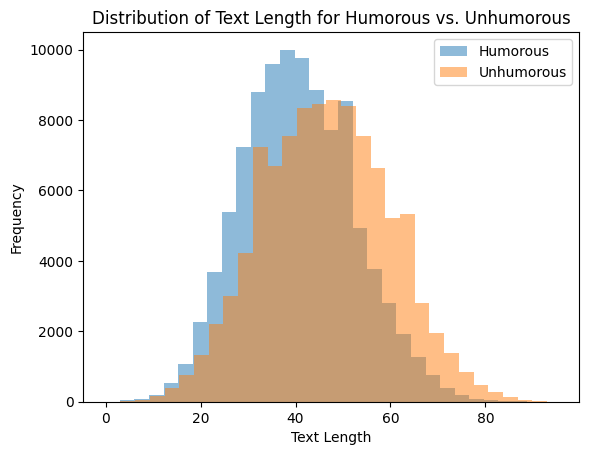

In [7]:
# Plot: Text length distribution for Humor vs. Not Humor
df_jokes['text_length'] = df_jokes['processed_text'].apply(len)
plt.hist(df_jokes[df_jokes['humor'] == True]['text_length'], bins = 30, alpha = 0.5, label = 'Humorous')
plt.hist(df_jokes[df_jokes['humor'] == False]['text_length'], bins = 30, alpha = 0.5, label = 'Unhumorous')
plt.legend()
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length for Humorous vs. Unhumorous')
plt.show()

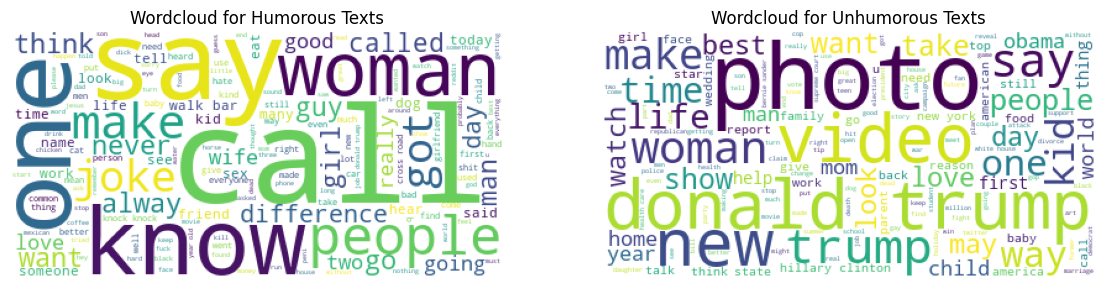

In [8]:
# Plot: Wordcloud for Humorous and Unhumorous Texts
plt.figure(figsize = (14, 4))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(background_color = 'white').generate(" ".join(df_jokes.processed_text[df_jokes.humor == True])))
plt.title("Wordcloud for Humorous Texts")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(background_color = 'white').generate(" ".join(df_jokes.processed_text[df_jokes.humor == False])))
plt.title("Wordcloud for Unhumorous Texts")
plt.axis("off")
plt.show()

In [9]:
# Check data balance
humorous_count = df_jokes.humor.sum()
unhumorous_count = df_jokes.shape[0] - humorous_count
print(f"Number of humorous texts: {humorous_count}\nNumber of unhumorous texts: {unhumorous_count}")

Number of humorous texts: 100000
Number of unhumorous texts: 100000


In [10]:
# Replace 'True' -> 1, 'False' -> 0
df_jokes.humor = df_jokes.humor.astype(int)
print(df_jokes.head())

                                                text  humor  \
0  Joe biden rules out 2020 bid: 'guys, i'm not r...      0   
1  Watch: darvish gave hitter whiplash with slow ...      0   
2  What do you call a turtle without its shell? d...      1   
3      5 reasons the 2016 election feels so personal      0   
4  Pasco police shot mexican migrant from behind,...      0   

                                      processed_text  text_length  
0                         joe biden rule bid running           26  
1      watch darvish gave hitter whiplash slow pitch           45  
2                           call turtle without dead           24  
3                      reason election feel personal           29  
4  pasco police shot mexican migrant behind new a...           57  


In [11]:
# Split the data into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df_jokes.processed_text.values, df_jokes.humor.values, test_size = 0.3, random_state = 42)

print(f"Size of the training set: {len(X_train)}\nSize of the test set: {len(X_test)}")

Size of the training set: 140000
Size of the test set: 60000


In [12]:
# Initialize vectorizers
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Vectorize 'text' using CountVectorizer
X_train_count_vectorized = count_vectorizer.fit_transform(X_train)
X_test_count_vectorized = count_vectorizer.transform(X_test)

# Vectorize 'text' using TF-IDF Vectorizer
X_train_tfidf_vectorized = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf_vectorized = tfidf_vectorizer.transform(X_test)

In [13]:
# Logistic regression (LR) with Stochastic Gradient Descent (SGD) training using CountVectorizer
lr_classifier_count_vectorized = SGDClassifier(loss = 'log_loss', max_iter = 1000)
lr_classifier_count_vectorized.fit(X_train_count_vectorized, y_train)

# Logistic regression (LR) with Stochastic Gradient Descent (SGD) training using TF-IDF Vectorizer
lr_classifier_tfidf_vectorized = SGDClassifier(loss = 'log_loss', max_iter = 1000)
lr_classifier_tfidf_vectorized.fit(X_train_tfidf_vectorized, y_train)

SGDClassifier(loss='log_loss')

In [14]:
# Multinomial Naive Bayes (MNB) training using CountVectorizer
mnb_classifier_count_vectorized = MultinomialNB()
mnb_classifier_count_vectorized.fit(X_train_count_vectorized, y_train)

# Multinomial Naive Bayes (MNB) training using TF-IDF Vectorizer
mnb_classifier_tfidf_vectorized = MultinomialNB()
mnb_classifier_tfidf_vectorized.fit(X_train_tfidf_vectorized, y_train)

MultinomialNB()

In [15]:
# Predictions for Logistic Regression with CountVectorizer
y_pred_lr_count = lr_classifier_count_vectorized.predict(X_test_count_vectorized)
accuracy_lr_count = accuracy_score(y_test, y_pred_lr_count)

# Predictions for Logistic Regression with TF-IDF Vectorizer
y_pred_lr_tfidf = lr_classifier_tfidf_vectorized.predict(X_test_tfidf_vectorized)
accuracy_lr_tfidf = accuracy_score(y_test, y_pred_lr_tfidf)

# Predictions for Multinomial Naive Bayes with CountVectorizer
y_pred_mnb_count = mnb_classifier_count_vectorized.predict(X_test_count_vectorized)
accuracy_mnb_count = accuracy_score(y_test, y_pred_mnb_count)

# Predictions for Multinomial Naive Bayes with TF-IDF Vectorizer
y_pred_mnb_tfidf = mnb_classifier_tfidf_vectorized.predict(X_test_tfidf_vectorized)
accuracy_mnb_tfidf = accuracy_score(y_test, y_pred_mnb_tfidf)

# Print the accuracies
print(f"Accuracy for Logistic Regression with CountVectorizer: {accuracy_lr_count:.4f}\
      \nAccuracy for Logistic Regression with TF-IDF Vectorizer: {accuracy_lr_tfidf:.4f}\
      \nAccuracy for Multinomial Naive Bayes with CountVectorizer: {accuracy_mnb_count:.4f}\
      \nAccuracy for Multinomial Naive Bayes with TF-IDF Vectorizer: {accuracy_mnb_tfidf:.4f}")

Accuracy for Logistic Regression with CountVectorizer: 0.8821      
Accuracy for Logistic Regression with TF-IDF Vectorizer: 0.8678      
Accuracy for Multinomial Naive Bayes with CountVectorizer: 0.8933      
Accuracy for Multinomial Naive Bayes with TF-IDF Vectorizer: 0.8903
